# Plotting in Python
Guide and code snippets for plotting in Python with Matplotlib and Seaborn.

## Imports and Data

The imported data contains a table of catalogued mars craters (about 384k data points) and a time series of avocados sold from 2015 to 2021 in the US (about 40k data points).  
For simple plots, X, Y and Z values are created with numpy.

In [113]:
from pathlib import Path
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

# For local data formats
import locale
locale.setlocale(locale.LC_ALL, 'de_DE')

# Import data sets
mars_data = pd.read_csv(Path('data', 'mars_craters.csv'))
avocado_data = pd.read_csv(Path('data', 'avocado.csv'))

# Create simple data
X = np.sort(np.random.uniform(0, 7, size=50))
Y = np.sin(X + np.random.normal(0,0.3, size=50)) + np.random.normal(0,0.7, size=50)

# avocado_data
# mars_data

# Matplotlib - basic figure with labels

### fig, ax = plt.subplots()  
Creates a figure (fig), wich contains the axes object (ax).  
The figure is the image of the whole plot, whereas the axes object contains the plotting method (e.g. a curve and it's axis).

Text(0.5, 0, 'ax-object label for x axes')

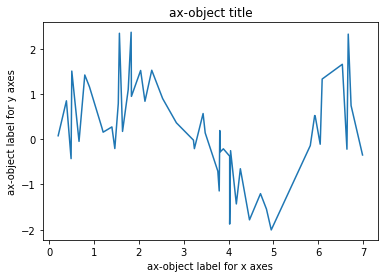

In [2]:
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set_title('ax-object title')
ax.set_ylabel('ax-object label for y axes')
ax.set_xlabel('ax-object label for x axes')

### plt.plot() 
To plot only one graph, it can suffice to directly use the plt.plot() method, which implicitly creates the figure with its corresponding axes.

Text(0.5, 0, 'ax-object label for x axes')

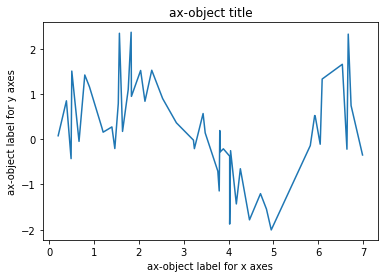

In [3]:
plt.plot(X, Y)
plt.title('ax-object title')
plt.ylabel('ax-object label for y axes')
plt.xlabel('ax-object label for x axes')

### Multiple graphs in one figure
In order to draw multiple graphs in one figure, the first shown declaration "fig, ax = plt.subplots()" is used.  
It allows to get and alter several axes objects.  
In this example, random data is created in the fly.

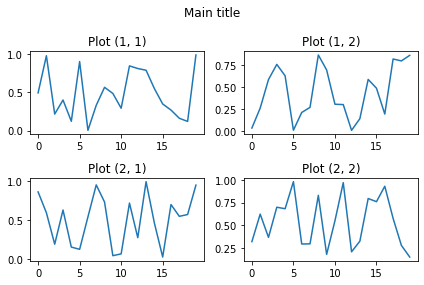

In [4]:
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols)
for row in range(rows):
    for col in range(cols):
        ax = axes[row][col]
        ax.plot(np.random.rand(20))
        ax.set_title(f'Plot ({row+1}, {col+1})')

fig.suptitle('Main title')
fig.tight_layout()

### Multiple plots in one graph, same scale

Text(0.5, 0, 'ax-object label for x axes')

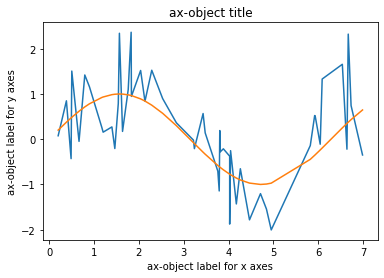

In [5]:
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.plot(X, np.sin(X))
ax.set_title('ax-object title')
ax.set_ylabel('ax-object label for y axes')
ax.set_xlabel('ax-object label for x axes')

### Multiple plots in one graph, different scales
In order to combine multiple scales and therfore different axis in one graph, multiple axes objects are required.  
With "twinx()" or "twiny()", the shared axes can be copied.  
Example for more than one additional axis: https://matplotlib.org/2.0.2/examples/axes_grid/demo_parasite_axes2.html

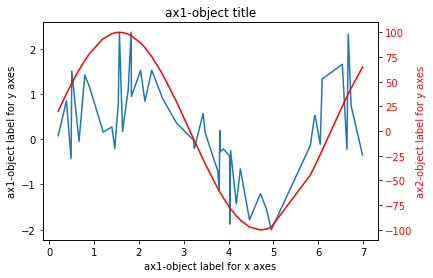

In [6]:
fig, ax1 = plt.subplots()

ax1.plot(X, Y)
ax1.set_title('ax1-object title')
ax1.set_ylabel('ax1-object label for y axes')
ax1.set_xlabel('ax1-object label for x axes')

ax2 = ax1.twinx()
ax2.plot(X, np.sin(X)*100, color="red")
ax2.set_ylabel('ax2-object label for y axes', color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Matplotlib - plot options and styling
While plot options and styling can be defined for each plot individually, often it is preferable to define the plotting style in advance, for all subsequently created plots. This chapter shows the most important styling options for use of figures in e.g. presentations.  
  
A comprehensive documentation can be found here: https://matplotlib.org/stable/tutorials/introductory/customizing.html  
matplotlib.rcParams: https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams

## Setting plotting defaults
Setting some defaults with rcParams.  
Default DPI in Jupyter is 72, ohterwise 100.

In [7]:
# Copy defaults for easy reset
rc_default = plt.rcParams.copy()

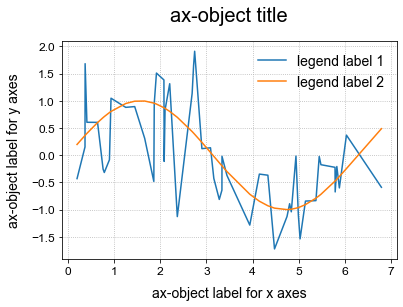

In [283]:
TICK_SIZE = 12
LABEL_SIZE = 14
TITLE_SIZE = 20
plt.rc('figure', figsize=(6, 4), dpi=72)
plt.rcParams['font.family'] = 'Arial'
plt.rc('font', size=TICK_SIZE)
plt.rc('axes', titlesize=TITLE_SIZE, labelsize=LABEL_SIZE, titlepad=20, labelpad=10)
plt.rc('xtick', labelsize=TICK_SIZE)
plt.rc('ytick', labelsize=TICK_SIZE)
plt.rc('legend', fontsize=LABEL_SIZE)
plt.rc('figure', titlesize=TITLE_SIZE)
plt.rc('savefig', bbox="tight")
plt.rc('savefig', facecolor="white")
plt.rc('savefig', dpi=100)


# Example with grid and legend
fig, ax = plt.subplots()
ax.plot(X, Y, label="legend label 1")
ax.plot(X, np.sin(X), label="legend label 2")
ax.set_title('ax-object title')
ax.set_xlabel('ax-object label for x axes')
ax.set_ylabel('ax-object label for y axes')
ax.legend(loc="best", frameon=False)
ax.grid(linestyle=':')
fig.savefig('example.png')

## Axis tick mark formatting
Often, a specific formatting of tick marks is required. This can be a number format (e.g. a precision) or an alteration of text labels.

Tick formatting: https://matplotlib.org/stable/api/ticker_api.html  
Some of the following examples are derived from here: https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html

### Adjusting the number of ticks
Especially useful if labels get crowded. However, here the number of ticks is increased.

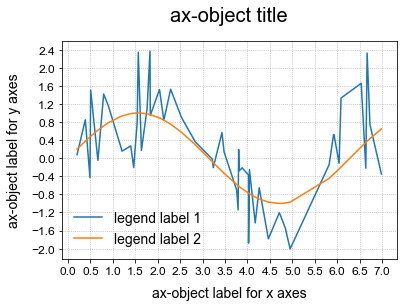

In [9]:
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.yaxis.set_major_locator(plt.MaxNLocator(15))
fig

### Adjusting the tick spacing
For presented data it could be more natural to space the ticks in multiples of pi.

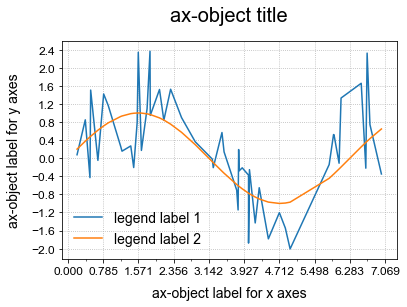

In [10]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))
fig

### Setting the number format

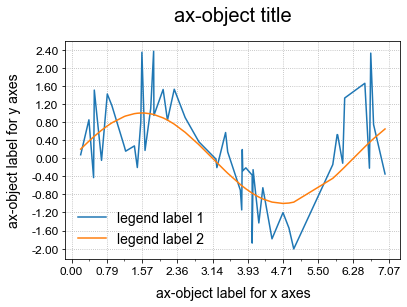

In [11]:
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
fig

### Full tick control with FuncFormatter
Matplotlibs FuncFormatter passes each tick value (value) and it's corresponding position (tick_number) through a custom defined function.

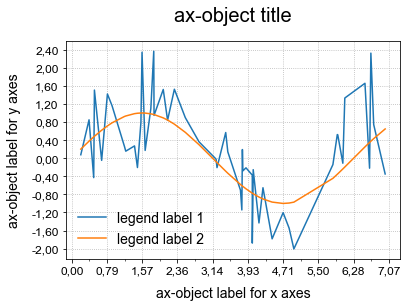

In [12]:
# Example with local number format

def format_de(value, tick_number):
    return locale.format_string('%.2f', value)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_de))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_de))
fig

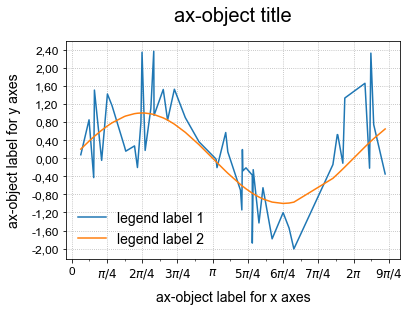

In [13]:
# Example with special formatting

def format_pi(value, tick_number):
    # find number of multiples of pi/4
    N = int(np.round(4 * value / np.pi))
    if N == 0:
        return '0'
    elif N == 1:
        return '$\pi/4$'
    elif N == 4:
        return '$\pi$'
    elif N % 4 > 0:
        return '${0}\pi/4$'.format(N)
    else:
        return '${0}\pi$'.format(N // 4)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_pi))
fig

In [14]:
# Rest rcParams
# plt.rcParams.update(rc_default)

### Code snippet: tick params

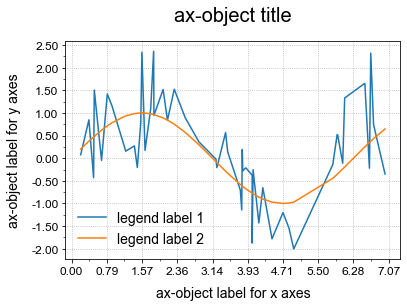

In [15]:
fig, ax = plt.subplots()
ax.plot(X, Y, label="legend label 1")
ax.plot(X, np.sin(X), label="legend label 2")
ax.set_title('ax-object title')
ax.set_xlabel('ax-object label for x axes')
ax.set_ylabel('ax-object label for y axes')
ax.legend(loc="best", frameon=False)
ax.grid(linestyle=':')
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 4))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

### Code snippet: tick params (3D)
More about 3D plotting: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

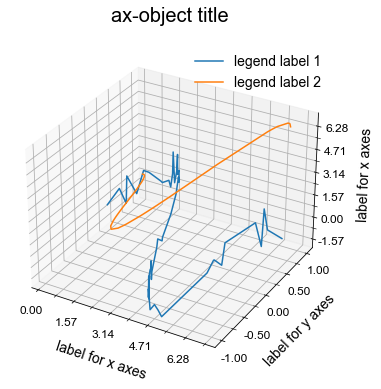

In [16]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection='3d')
ax.plot3D(X, np.sin(X), Y, label="legend label 1")
ax.plot3D(X, np.cos(X), X, label="legend label 2")
ax.set_title('ax-object title')
ax.set_xlabel('label for x axes')
ax.set_ylabel('label for y axes')
ax.set_zlabel('label for x axes')
ax.legend(loc="best", frameon=False)
ax.grid(linestyle=':')
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.zaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.zaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Plotting with Seaborn
Seaborn plotting functions are avaiable on figure- and on axes-level: https://seaborn.pydata.org/tutorial/function_overview.html

In [254]:
# Selecting data
crater_diam = mars_data['DIAM_CIRCLE_IMAGE']
crater_depth = mars_data['DEPTH_RIMFLOOR_TOPOG']

def binning_2D(pd_data, bin_x: list, bin_y: list):
    # cuts data frame in 2D bins and counts data points per bin
    df = pd_data.copy()
    df['bin_x'] = pd.cut(df.iloc[:, 0], bin_x, include_lowest=True)
    df['bin_y'] = pd.cut(df.iloc[:, 1], bin_y, include_lowest=True)
    df = df.groupby(['bin_x', 'bin_y']).size().reset_index(name='count')
    df['bin_x'] = df['bin_x'].map(lambda x : x.mid)
    df['bin_y'] = df['bin_y'].map(lambda x : x.mid)
    df = df.pivot_table(columns='bin_x', index='bin_y', values='count')
    df = df.sort_values(by=['bin_y'], ascending=False)
    return df


### Jointplot

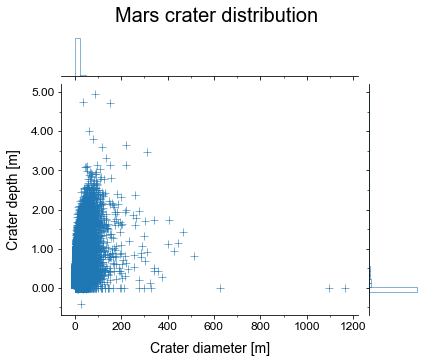

In [20]:
g = sns.jointplot(x=crater_diam, y=crater_depth, marker='+',
                    s=50, marginal_kws=dict(bins=50, fill=False))
g.fig.set_size_inches(6,5)
g.fig.subplots_adjust(top=0.90)
ax = g.ax_joint
plt.suptitle('Mars crater distribution')
ax.set_xlabel('Crater diameter [m]')
ax.set_ylabel('Crater depth [m]')
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(200))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

### Heatmap
Altering axis labels in a heatmap requieres some special treatment. Here, a list comprehension is used.

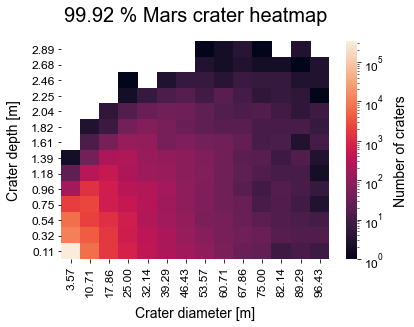

In [290]:
# Selecting data
data = mars_data[['DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']]
diameter_bins = np.linspace(0, 100, num=15)
depth_bins = np.linspace(0, 3, num=15)
df = binning_2D(data, diameter_bins, depth_bins)
elements_full = len(mars_data.index)
elements_cut = df.sum().sum()

# Plotting distribution with over 99 % of all mars crates 
ax = sns.heatmap(df, norm=LogNorm())
cbar = ax.collections[0].colorbar
ax.set_title(f'{elements_cut/elements_full*100:.2f} % Mars crater heatmap')
ax.set_xlabel('Crater diameter [m]')
ax.set_ylabel('Crater depth [m]')
cbar.set_label("Number of craters")
xlabels = [f'{float(i.get_text()):.2f}' for i in ax.get_xticklabels()]
ylabels = [f'{float(i.get_text()):.2f}' for i in ax.get_yticklabels()]
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)


plt.show()

# Further Code snipptes
Code snippets with mosed used plotting options. 

Some of the following examples are derived from here: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

## Figure size: inches, cm, pixels
Note: an exact plot size in px doesn't work with rcParam bbox='tight' because of unpredictable cropping  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html

In [17]:
cm = cm = 1/2.54
px = 1/plt.rcParams['figure.dpi']

plt.rc('figure', figsize=(15*cm, 10*cm))
plt.rc('figure', figsize=(600*px, 400*px))
plt.rc('figure', figsize=(6, 4))

# Example
# ex1()

## Shared axis
Axis in figures with several subplots can be shared.

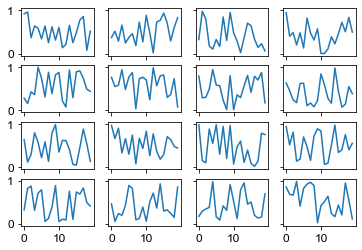

In [18]:
rows = 4
cols = 4

fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
for i in range(rows):
    for j in range(cols):
        ax1 = axes[i][j]
        ax1.plot(np.random.rand(20))

## Heatmap (with color bar label format)

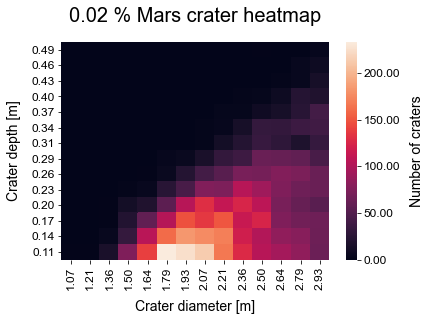

In [291]:
# Selecting data
data = mars_data[['DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']]
diameter_bins = np.linspace(1, 3, num=15)
depth_bins = np.linspace(0.1, 0.5, num=15)
df = binning_2D(data, diameter_bins, depth_bins)
elements_full = len(mars_data.index)
elements_cut = df.sum().sum()

# Plotting
ax = sns.heatmap(df)
cbar = ax.collections[0].colorbar
ax.set_title(f'{elements_cut/elements_full:.2f} % Mars crater heatmap')
ax.set_xlabel('Crater diameter [m]')
ax.set_ylabel('Crater depth [m]')
cbar.set_label("Number of craters")
xlabels = [f'{float(i.get_text()):.2f}' for i in ax.get_xticklabels()]
ylabels = [f'{float(i.get_text()):.2f}' for i in ax.get_yticklabels()]
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)
clabels = [f'{i:.2f}' for i in cbar.get_ticks()]
cbar.set_ticks(cbar.get_ticks())
cbar.set_ticklabels(clabels)

## Heatmap (with annotation)

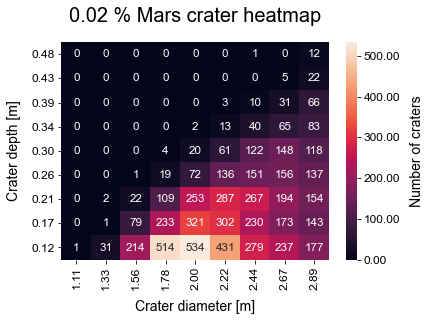

In [298]:
# Selecting data
data = mars_data[['DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']]
diameter_bins = np.linspace(1, 3, num=10)
depth_bins = np.linspace(0.1, 0.5, num=10)
df = binning_2D(data, diameter_bins, depth_bins)
elements_full = len(mars_data.index)
elements_cut = df.sum().sum()


# Plotting
ax = sns.heatmap(df, fmt=".0f", annot=df, annot_kws={"size": 35 / np.sqrt(len(df))})
cbar = ax.collections[0].colorbar
ax.set_title(f'{elements_cut/elements_full:.2f} % Mars crater heatmap')
ax.set_xlabel('Crater diameter [m]')
ax.set_ylabel('Crater depth [m]')
cbar.set_label("Number of craters")
xlabels = [f'{float(i.get_text()):.2f}' for i in ax.get_xticklabels()]
ylabels = [f'{float(i.get_text()):.2f}' for i in ax.get_yticklabels()]
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)
clabels = [f'{i:.2f}' for i in cbar.get_ticks()]
cbar.set_ticks(cbar.get_ticks())
cbar.set_ticklabels(clabels)